<a href="https://colab.research.google.com/github/lubaochuan/ml_python/blob/main/Project_1_sample_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1 Sample Solution

**Dataset:** Breast Cancer Wisconsin (Diagnostic) – scikit-learn  
**Task:** Binary classification (malignant vs benign)  
**Textbook Alignment:** *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow (3rd ed.)*


## 1️⃣ Dataset Selection & Description


- **Source:** `sklearn.datasets.load_breast_cancer`
- **Rows:** 569
- **Features:** 30 numerical features
- **Target:** Malignant (0) vs Benign (1)
- **Missing values:** None
- **Class balance:** ~63% benign, ~37% malignant

**Ethics note:** Medical data; predictions should assist—not replace—clinical judgment.


## 2️⃣ Reproducible Setup

In [24]:

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

np.random.seed(42)

print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)
print("Scikit-learn:", sklearn.__version__)


NumPy: 2.0.2
Pandas: 2.2.2
Scikit-learn: 1.6.1


**Annotation:**

This code block sets up the environment for the machine learning project. It imports essential libraries like NumPy for numerical operations, Pandas for data manipulation, Scikit-learn for machine learning tasks, and Matplotlib for plotting. It also specifically imports various modules and functions from Scikit-learn that will be used later for data loading, splitting, preprocessing, modeling, and evaluation. Finally, it sets a random seed for **reproducibility** and prints the versions of NumPy, Pandas, and Scikit-learn to ensure consistency.

## 3️⃣ Load Data & Train/Test Split

In [25]:

data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


**Annotation:**

This section loads the Breast Cancer Wisconsin (Diagnostic) dataset from `sklearn.datasets` and prepares it for machine learning. The steps are:

1.  **Load Data**: `data = load_breast_cancer(as_frame=True)` loads the dataset. The `as_frame=True` argument ensures that the data is loaded into a Pandas DataFrame, making it easier to inspect and work with.
2.  **Separate Features and Target**: The features (input variables) are assigned to `X = data.data`, and the target variable (what we want to predict – malignant or benign) is assigned to `y = data.target`.
3.  **Train/Test Split**: `train_test_split` divides the dataset into training and testing sets. This is crucial for evaluating the model's performance on unseen data.
    *   `test_size=0.2`: 20% of the data is allocated for the test set, and 80% for the training set.
    *   `stratify=y`: This parameter ensures that the proportion of target classes (malignant vs. benign) is the same in both the training and test sets as it is in the original dataset. This is particularly important for imbalanced datasets.
    *   `random_state=42`: Setting a `random_state` ensures that the split is always the same, making the results reproducible.

**Summary Features (DataFrame X)**

- **Source:** `sklearn.datasets.load_breast_cancer`
- **Rows:** 569
- **Features:** 30 numerical features
- **Target:** Malignant (0) vs Benign (1)
- **Missing values:** None
- **Class balance:** ~63% benign, ~37% malignant

The dataset contains 30 numerical features, all of type `float64`, which represent various characteristics of cell nuclei from the breast mass. These features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.

Each feature describes a characteristic of the cell nuclei, such as:

*   **Radius:** distances from center to points on the perimeter
*   **Texture:** standard deviation of gray-scale values
*   **Perimeter:** perimeter of the tumor
*   **Area:** area of the tumor
*   **Smoothness:** local variation in radius lengths
*   **Compactness:** perimeter^2 / area - 1.0
*   **Concavity:** severity of concave portions of the contour
*   **Concave points:** number of concave portions of the contour
*   **Symmetry:** symmetry of the tumor
*   **Fractal dimension:** "coastline approximation" - 1

For each of these characteristics, three measures are reported:

1.  **mean:** the mean value of the characteristic.
2.  **se (standard error):** the standard error of the characteristic.
3.  **worst:** the "worst" or largest (mean of the three largest values) of the characteristic.

All features are continuous numerical values. A more detailed explanation for each specific feature can be found in the official scikit-learn documentation for the Breast Cancer Wisconsin (Diagnostic) dataset.


## 4️⃣ Baseline Models

In [26]:

from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
print("Dummy accuracy:", dummy.score(X_test, y_test))

log_reg_baseline = LogisticRegression(max_iter=4000)
log_reg_baseline.fit(X_train, y_train)
print("Logistic Regression accuracy:", log_reg_baseline.score(X_test, y_test))


Dummy accuracy: 0.631578947368421
Logistic Regression accuracy: 0.9649122807017544


**Annotation:**

This code block sets up two baseline models to compare against more complex models later. The first, `DummyClassifier`, is a simple model that predicts the most frequent class, providing a basic accuracy benchmark. The second is a `LogisticRegression` model, a common linear classifier. Both models are trained on the `X_train` and `y_train` data and then evaluated on the `X_test` and `y_test` data, with their accuracies printed to the console.

## 5️⃣ Pipeline with Preprocessing

In [27]:

pipeline_lr = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=500))
])


**Annotation:**

This code block defines a Scikit-learn `Pipeline` named `pipeline_lr`. A pipeline sequentially applies a list of transformers and a final estimator. In this case, it's setting up a machine learning workflow that includes three steps:
1.  **Imputation:** `SimpleImputer(strategy='median')` is used to handle potential missing values. If there were any, it would fill them with the median value of each feature. Although the Breast Cancer Wisconsin dataset has no missing values, including an imputer in a pipeline is a robust practice for generalizability.
2.  **Scaling:** `StandardScaler()` standardizes the features by removing the mean and scaling to unit variance. This is crucial for many machine learning algorithms, including Logistic Regression, as it can help them converge faster and perform better.
3.  **Model:** `LogisticRegression(max_iter=500)` is the final estimator in the pipeline. It's a linear model used for binary classification, and `max_iter=500` sets the maximum number of iterations for the solver to converge.

Scaling to unit variance means transforming your data so that each feature (column) has a variance of 1. When `StandardScaler` is applied, it not only centers the data around zero (by subtracting the mean) but also scales it so that the standard deviation of each feature becomes 1. Since variance is the square of the standard deviation, this effectively means each feature will have a variance of 1.

This is beneficial for many machine learning algorithms because:
* **Prevents features with larger magnitudes from dominating**: If one feature has a very large range of values compared to another, algorithms that rely on distance calculations (like k-nearest neighbors, support vector machines, or neural networks) might implicitly give more weight to that feature. Scaling ensures all features contribute equally based on their relative importance, not just their scale.
* **Improves convergence for optimization algorithms**: For algorithms that use gradient descent (like Logistic Regression and neural networks), features with very different scales can lead to an elongated loss function, making the optimization process slower and more prone to getting stuck in local minima. Scaling helps create a more spherical loss function, leading to faster and more stable convergence.

## 6️⃣ Model Selection with Cross-Validation

In [28]:

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lr_scores = cross_val_score(pipeline_lr, X_train, y_train, cv=cv, scoring="roc_auc")
print("LogReg CV ROC AUC:", lr_scores.mean(), "+/-", lr_scores.std())

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf_scores = cross_val_score(rf, X_train, y_train, cv=cv, scoring="roc_auc")
print("RandomForest CV ROC AUC:", rf_scores.mean(), "+/-", rf_scores.std())


LogReg CV ROC AUC: 0.9958720330237357 +/- 0.004960006126191094
RandomForest CV ROC AUC: 0.9894220846233228 +/- 0.008635804094664785


**Annotation:**

This code block performs **cross-validation** to evaluate the performance of two different models: the `pipeline_lr` (Logistic Regression) and a `RandomForestClassifier`.

First, it sets up a `StratifiedKFold` cross-validation strategy with 5 splits, ensuring that each fold maintains the same proportion of target classes as the overall dataset, which is important for imbalanced datasets.

Then, for both the Logistic Regression pipeline and the RandomForestClassifier, it uses `cross_val_score` to train and evaluate the models across these 5 folds, using 'roc_auc' as the scoring metric. This provides a more robust estimate of the model's performance than a single train/test split. Finally, it prints the mean and standard deviation of the ROC AUC scores for each model, giving an indication of their average performance and consistency.

## 7️⃣ Final Evaluation on Test Set

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix:
 [[41  1]
 [ 1 71]]
Test ROC AUC: 0.9953703703703703


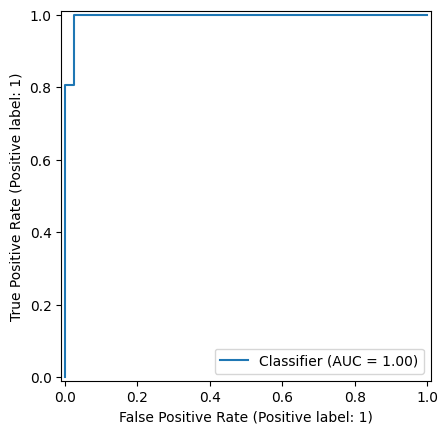

In [29]:

pipeline_lr.fit(X_train, y_train)
y_pred = pipeline_lr.predict(X_test)
y_proba = pipeline_lr.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print("Test ROC AUC:", roc_auc)

RocCurveDisplay.from_predictions(y_test, y_proba)
plt.show()


**Annotation:**

This code block performs the final evaluation of the `pipeline_lr` (which contains the `LogisticRegression` model with preprocessing) on the `X_test` and `y_test` data.

First, the `pipeline_lr` is trained on the full training set (`X_train`, `y_train`). Then, it makes predictions (`y_pred`) and predicts probabilities (`y_proba`) on the test set. Finally, it prints a detailed `classification_report` (which includes precision, recall, f1-score, and support), a `confusion_matrix`, and calculates and prints the `roc_auc_score`. It also displays the Receiver Operating Characteristic (ROC) curve to visually assess the model's performance across different classification thresholds.

## 8️⃣ Feature Importance (Logistic Regression Coefficients)

In [30]:

coef_df = pd.DataFrame({
    "feature": X.columns,
    "coefficient": pipeline_lr.named_steps["model"].coef_[0]
}).sort_values(by="coefficient", key=abs, ascending=False)

coef_df.head(10)


,feature,coefficient
21,worst texture,-1.255088
10,radius error,-1.082965
27,worst concave points,-0.953686
23,worst area,-0.947756
20,worst radius,-0.947616
28,worst symmetry,-0.939181
13,area error,-0.929104
26,worst concavity,-0.823151
22,worst perimeter,-0.763220
24,worst smoothness,-0.746625


**Annotation:**

This code block is designed to extract and display the feature importance from the trained Logistic Regression model within the pipeline. It constructs a Pandas DataFrame named `coef_df` with two columns: 'feature' and 'coefficient'.

1.  `'feature': X.columns`: The 'feature' column is populated with the names of the features from the `X` DataFrame.
2.  `'coefficient': pipeline_lr.named_steps["model"].coef_[0]`: The 'coefficient' column contains the corresponding coefficients from the trained `LogisticRegression` model. `pipeline_lr.named_steps["model"]` accesses the `LogisticRegression` model within the `pipeline_lr`, and `.coef_[0]` retrieves its coefficients for the positive class in binary classification.

3.  `.sort_values(by="coefficient", key=abs, ascending=False)`: The `coef_df` is then sorted. `by="coefficient"` specifies sorting by the coefficient values, `key=abs` applies the absolute value function during sorting (so both large positive and large negative coefficients indicate high importance), and `ascending=False` sorts in descending order.

4.  `coef_df.head(10)`: Finally, this displays the top 10 features with the largest absolute coefficients, indicating their importance in the model.

## 9️⃣ Robustness, Risks, and Limitations


- **Leakage prevention:** All preprocessing is inside the pipeline.
- **Imbalance:** Mild; ROC AUC used in addition to accuracy.
- **Generalization:** Dataset is curated; real-world hospital data may differ.
- **Next steps:** External validation, calibration, domain expert feedback.


## 🔟 AI Assistance Log


AI assistance was used to:
- Scaffold the notebook structure
- Recall standard scikit-learn evaluation patterns

All code was verified against official scikit-learn documentation.


## 📚 References


- Géron, A. *Hands-On Machine Learning*, 3rd ed.
- https://scikit-learn.org/stable/
